# Basic simulation template

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
# import packages and authenticate (if needed)
import numpy as np
import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web
# web.configure("YOUR API KEY GOES HERE")

In [2]:
# set up parameters of simulation (length scales are micrometers)
freq0 = td.C_0 / 0.75

In [3]:
# create structure
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), 
    medium=td.Medium(permittivity=2.0)
)

In [4]:
# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=freq0 / 10.0),
    polarization="Ey",
)

In [5]:
# create monitor
monitor = td.FieldMonitor(
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields",
    colocate=True,
)

In [6]:
# Initialize simulation
sim = td.Simulation(
    size=(4, 3, 3),
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=25),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=120/freq0,
)

In [7]:
# visualize in 3D
sim.plot_3d()

In [8]:
# set up parameters of simulation (length scales are micrometers)
grid_cells_per_wvl = 30
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), medium=dielectric
)

# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization="Ey",
)

# create monitor
monitor = td.FieldMonitor(
    fields=["Ex", "Ey", "Hz"],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields_on_plane",
)

# Initialize simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=grid_cells_per_wvl),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
)


In [9]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)


simulation grid is shaped [192, 192, 192] for 7 million cells.


In [10]:
# run simulation
data = td.web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=True)

[09:58:34] Created task 'quickstart' with task_id 'fdve-2e18b02a-4e0f-45ca-b68b-a681d2fae473v1'.      ]8;id=567757;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=854220;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\

           View task using web UI at                                                                  ]8;id=933349;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=157864;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#191\191]8;;\
           ]8;id=51028;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2e18b02a-4e0f-45ca-b68b-a681d2fae473v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=525661;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2e18b02a-4e0f-45ca-b68b-a681d2fae473v1\taskId]8;;\]8;id=51028;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2e18b02a-4e0f-45ca-b68b-a681d2fae473v1\=]8;;\]8;id=761523;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2e18b02a-4e0f-45ca-b68b-a681d2fae473v1\fdve]8;;\]8;id=51028;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2e18b02a-4e0f-45ca-b68b-a681d2fae473v1\-2e18b02a-4e0f-45ca-b68b-a681d2fae47]8;;\              
           ]8;id=51028;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2e18b02a-4e0f-45ca-b68b-a681d2fae473v1\3v1']8;;\.                                                                                                   

Output()

[09:58:36] status = queued                                                                            ]8;id=450090;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=746666;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#363\363]8;;\

Output()

[09:58:39] status = preprocess                                                                        ]8;id=399548;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=875609;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#357\357]8;;\

[09:58:44] Maximum FlexCredit cost: 0.028. Use 'web.real_cost(task_id)' to get the billed FlexCredit  ]8;id=282600;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=684734;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#343\343]8;;\
           cost after a simulation run.                                                                            

           starting up solver                                                                         ]8;id=661581;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=30891;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#379\379]8;;\

           running solver                                                                             ]8;id=360351;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=618876;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#389\389]8;;\

           To cancel the simulation, use 'web.delete(task_id)' or delete the task in the web UI.      ]8;id=950987;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=691449;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#390\390]8;;\
           Terminating the Python script will not stop the job running on the cloud.                               

Output()

[09:59:04] early shutoff detected, exiting.                                                           ]8;id=276855;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=772207;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#407\407]8;;\

           status = postprocess                                                                       ]8;id=751434;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=971454;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#424\424]8;;\

Output()

[09:59:08] status = success                                                                           ]8;id=333884;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=16509;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#431\431]8;;\

Output()

[09:59:10] loading SimulationData from data/data.hdf5                                                 ]8;id=90797;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=289179;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#609\609]8;;\

In [11]:
# see the log
print(data.log)


Simulation domain Nx, Ny, Nz: [192, 192, 192]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.3014e+06.
Using subpixel averaging: True
Number of time steps: 1.2659e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 3.1624e-17


Compute source modes time (s):     0.0210
Compute monitor modes time (s):    0.0025
Rest of setup time (s):            2.1051

Running solver for 12659 time steps...
- Time step    506 / time 1.60e-14s (  4 % done), field decay: 1.00e+00
- Time step    839 / time 2.65e-14s (  6 % done), field decay: 1.00e+00
- Time step   1012 / time 3.20e-14s (  8 % done), field decay: 1.00e+00
- Time step   1519 / time 4.80e-14s ( 12 % done), field decay: 1.44e-01
- Time step   2025 / time 6.40e-14s ( 16 % done), field decay: 3.24e-02
- Time step   2531 / time 8.00e-14s ( 20 % done), field decay: 1.38e-02
- Time step   3038 / time 9.61e-14s ( 24 % done), field decay: 6.96e-03
- Time step   3544 / time 1.12e-13s ( 28 % done), field decay: 3.33e-03
- Time

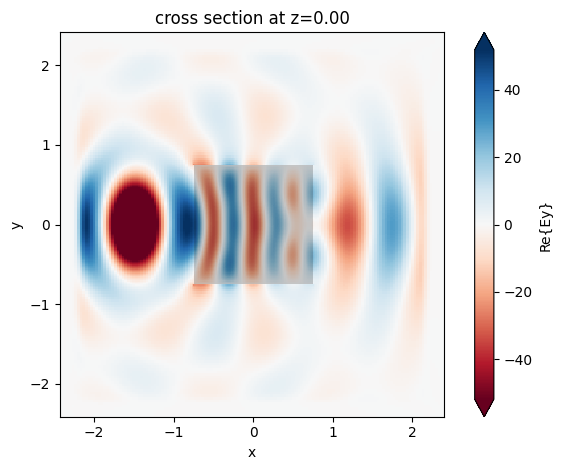

In [12]:
# plot the field data stored in the monitor
ax = data.plot_field("fields_on_plane", "Ey", z=0)